In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
nwpt_waves = pd.read_csv('/Users/dfreema1/Downloads/CO-OPS__8452660__ml.csv')

In [4]:
nwpt_waves.columns = ['Year', 'Month', 'Highest', 'Mean_Higher_High_Water', 'Mean_High_Water', 'Mean_Sea_Level', 
                      'Mean_Tide_Level', 'Mean_Low_Water','Mean_Lower_Low_Water', 'Diurnal_Tide_Level', 'Great_Diurnal_Range',
                      'Mean_Range_of_Tide', 'Mean_Diurnal_High_Water_Inequality', 'Mean_Diurnal_Low_Water_Inequality', 
                      'Greenwich_High_Water_Interval', 'Greenwich_Low_Water_Interval', 'Lowest', 'Inferred ']

In [5]:
nwpt_waves.Year = (nwpt_waves.Year.astype(int))
nwpt_waves.Month = (nwpt_waves.Month.astype(int))


In [6]:
nwpt_waves['day'] = 5

In [7]:
date = nwpt_waves[['Year', 'Month', 'day']]

In [8]:
date = date.assign(Dt=pd.to_datetime(date))

In [9]:
date.Dt

0     1990-06-05
1     1990-07-05
2     1990-08-05
3     1990-09-05
4     1990-10-05
5     1990-11-05
6     1990-12-05
7     1991-01-05
8     1991-02-05
9     1991-03-05
10    1991-04-05
11    1991-05-05
12    1991-06-05
13    1991-07-05
14    1991-08-05
15    1991-09-05
16    1991-10-05
17    1991-11-05
18    1991-12-05
19    1992-01-05
20    1992-02-05
21    1992-03-05
22    1992-04-05
23    1992-05-05
24    1992-06-05
25    1992-07-05
26    1992-08-05
27    1992-09-05
28    1992-10-05
29    1992-11-05
         ...    
305   2015-11-05
306   2015-12-05
307   2016-01-05
308   2016-02-05
309   2016-03-05
310   2016-04-05
311   2016-05-05
312   2016-06-05
313   2016-07-05
314   2016-08-05
315   2016-09-05
316   2016-10-05
317   2016-11-05
318   2016-12-05
319   2017-01-05
320   2017-02-05
321   2017-03-05
322   2017-04-05
323   2017-05-05
324   2017-06-05
325   2017-07-05
326   2017-08-05
327   2017-09-05
328   2017-10-05
329   2017-11-05
330   2017-12-05
331   2018-01-05
332   2018-02-

In [10]:
nwpt_waves['Date'] = date['Dt']

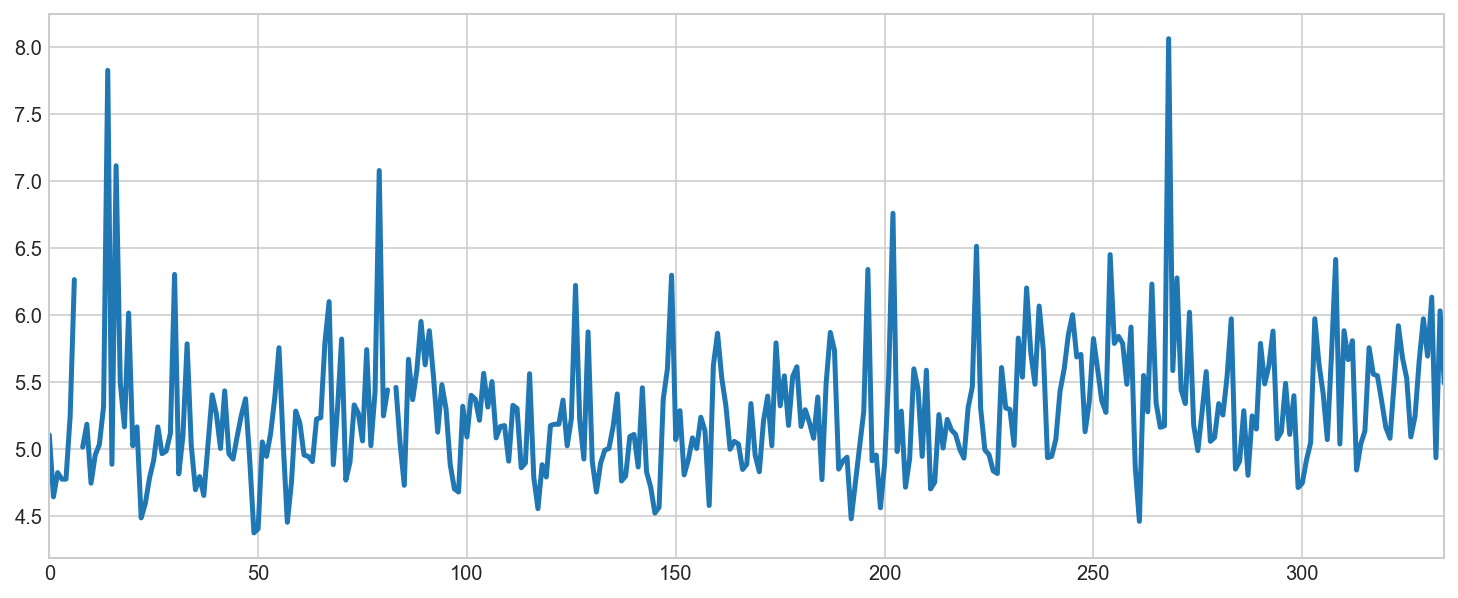

In [11]:
nwpt_waves.Highest.plot(lw=2.5, figsize=(12.5, 5));

In [12]:
nwpt_waves.drop('Year', axis=1, inplace=True)
nwpt_waves.drop('Month', axis=1, inplace=True)
nwpt_waves.drop('day', axis=1, inplace=True)

In [13]:
nwpt_waves.head()

,Highest,Mean_Higher_High_Water,Mean_High_Water,Mean_Sea_Level,Mean_Tide_Level,Mean_Low_Water,Mean_Lower_Low_Water,Diurnal_Tide_Level,Great_Diurnal_Range,Mean_Range_of_Tide,Mean_Diurnal_High_Water_Inequality,Mean_Diurnal_Low_Water_Inequality,Greenwich_High_Water_Interval,Greenwich_Low_Water_Interval,Lowest,Inferred,Date
0,5.108,3.805,3.527,1.725,1.847,0.167,0.046,1.925,3.760,3.360,0.279,0.121,0.27,5.91,-0.512,0,1990-06-05
1,4.645,3.737,3.487,1.716,1.837,0.177,0.055,1.896,3.681,3.310,0.249,0.121,0.32,5.87,-0.414,0,1990-07-05
2,4.826,3.796,3.595,1.847,1.955,0.318,0.187,1.998,3.609,3.281,0.200,0.121,0.30,5.85,-0.545,0,1990-08-05
3,4.777,3.805,3.605,1.827,1.935,0.265,0.137,1.968,3.671,3.340,0.190,0.131,0.26,5.93,-0.863,0,1990-09-05
4,4.777,3.878,3.658,1.788,1.925,0.187,0.006,1.945,3.881,3.471,0.220,0.190,0.28,5.87,-1.122,0,1990-10-05


In [14]:
nwpt_waves['Date'] = pd.to_datetime(nwpt_waves.Date).dt.to_period('M')

In [15]:
nwpt_waves.set_index('Date', inplace=True, drop=True)

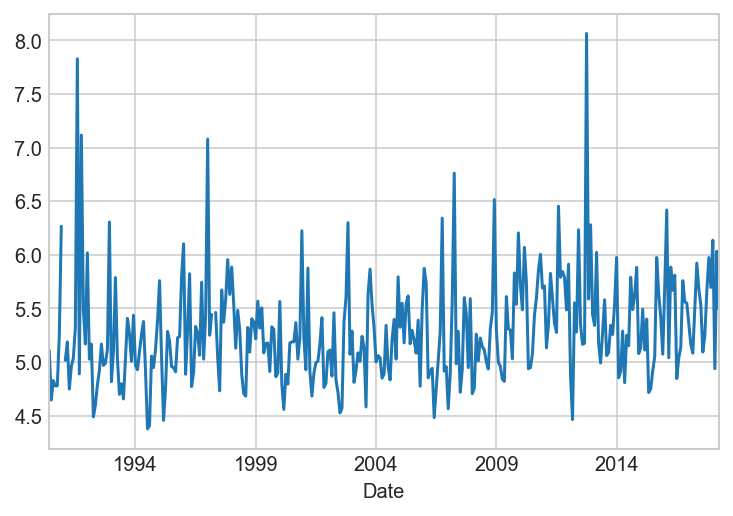

In [16]:
nwpt_waves.Highest.plot();

In [17]:
date_ticks = nwpt_waves.index.to_timestamp()

In [18]:
yearly = nwpt_waves.Highest.resample('A').mean().rolling(window=3, center=False).mean()

In [19]:
date_ticks_orig = nwpt_waves.index.to_timestamp()
date_ticks_roll = yearly.index.to_timestamp()

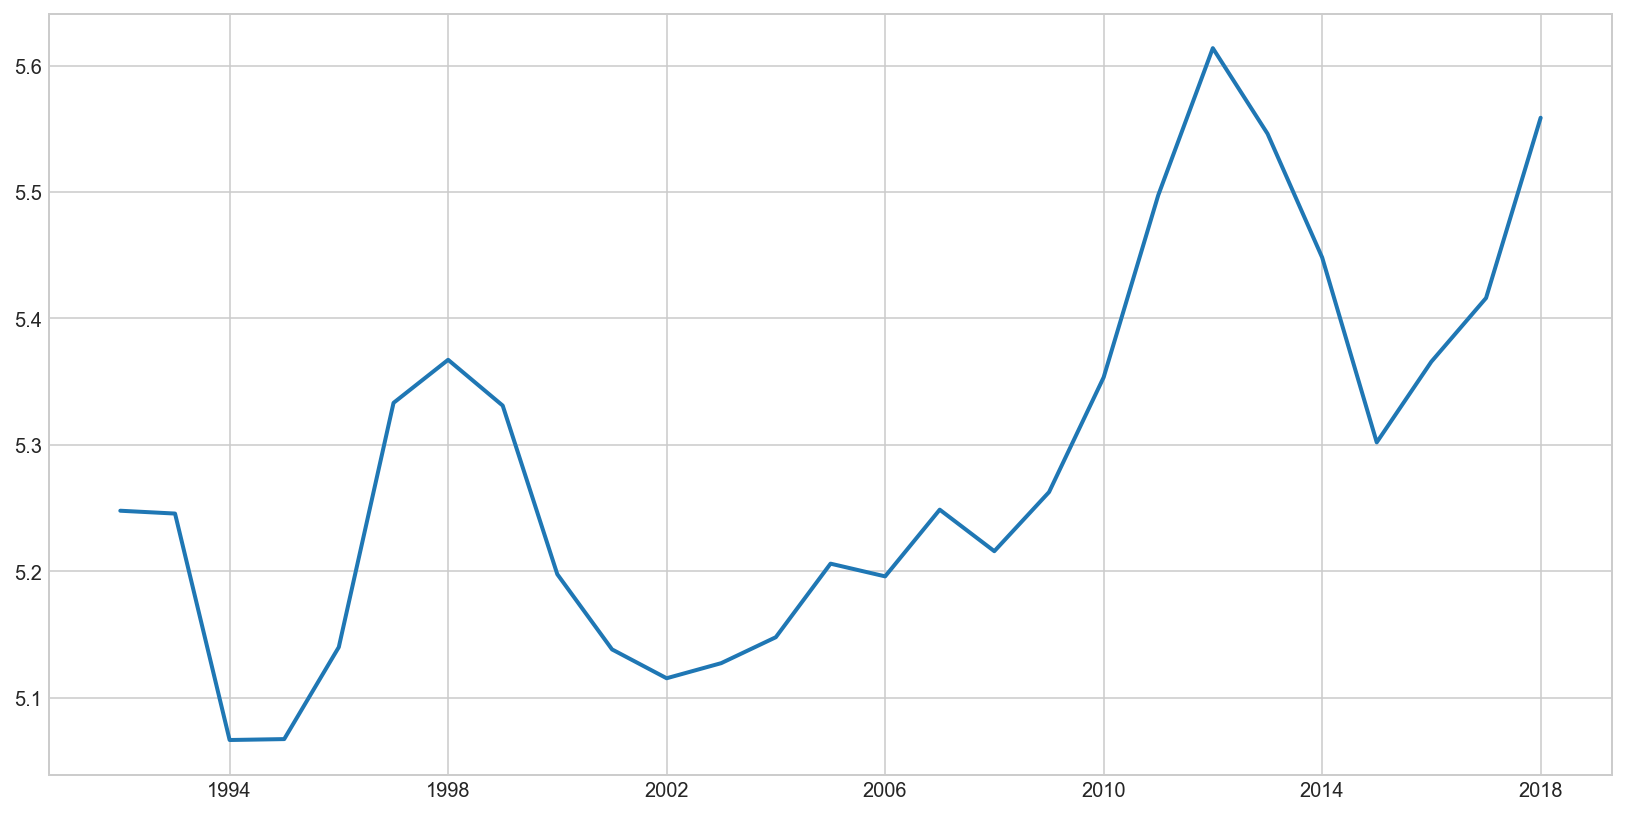

In [20]:
plt.figure(figsize=(14,7))
plt.plot(date_ticks_roll, yearly.values, lw=2);

In [22]:
nwpt_waves['highest_diff'] = nwpt_waves.Highest.diff()

In [23]:
from statsmodels.tsa.arima_model import ARMA
ar1 = ARMA(nwpt_waves.highest_diff.dropna().values, (1, 0)).fit()

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [26]:
prediction = ar1.predict()

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


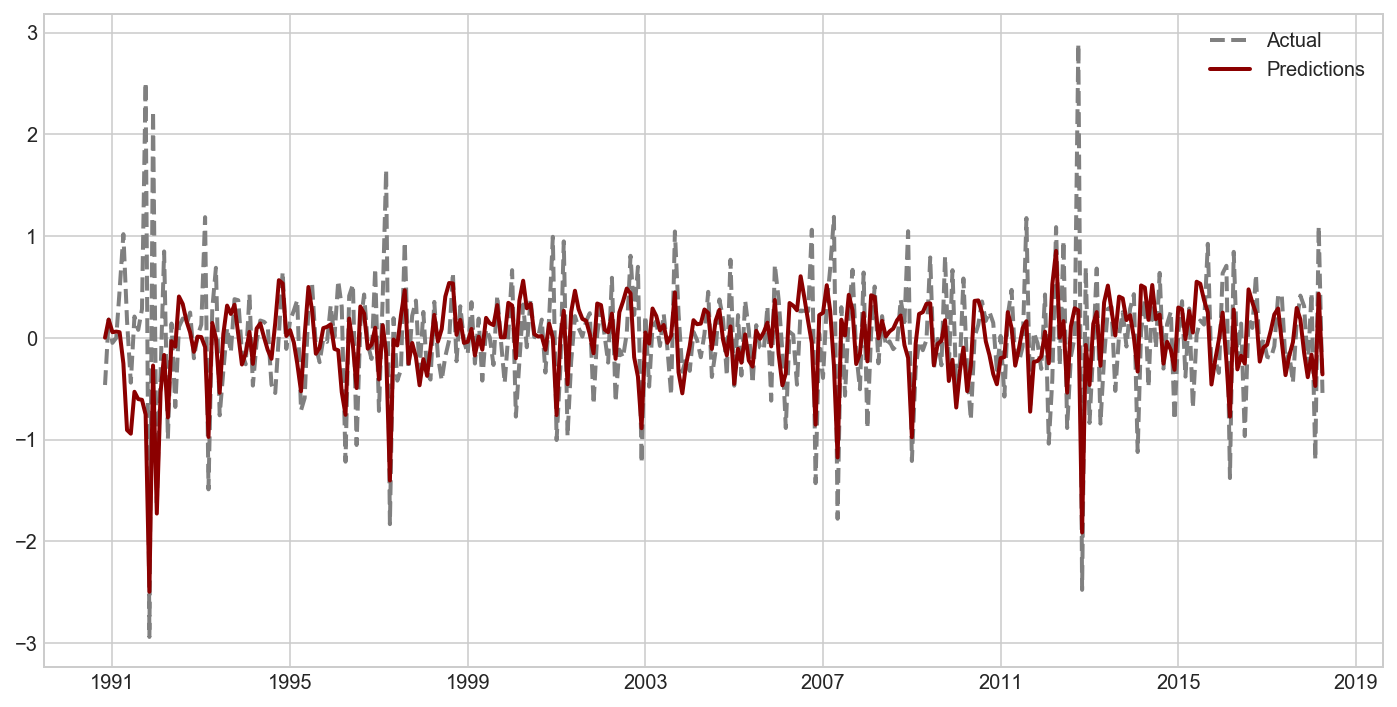

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(date_ticks[5:], nwpt_waves.highest_diff.dropna().values, lw=2, color='grey', ls='dashed', label='Actual')
ax.plot(date_ticks[5:], prediction, lw=2, color='darkred', label='Predictions')
plt.legend()
plt.show();

In [28]:
from sklearn.metrics import r2_score
r2_score(nwpt_waves.highest_diff.dropna().values, prediction)

0.21018140518150086

In [82]:
ma1 = ARMA(nwpt_waves.highest_diff.dropna().values, (0,2)).fit()

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [83]:
ma1.summary()

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  330
Model:                     ARMA(0, 2)   Log Likelihood                -239.785
Method:                       css-mle   S.D. of innovations              0.499
Date:                Thu, 07 Jun 2018   AIC                            487.570
Time:                        20:23:08   BIC                            502.766
Sample:                             0   HQIC                           493.631
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.002      0.975      0.330      -0.002       0.007
ma.L1.y       -0.7512      0.056    -13.412      0.000      -0.861      -0.641
ma.L2.y       -0.1891      0.070     -2.693      0.007      -0.327      -0.051
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0525           +0.0000j            1.0525            0.0000
MA.2           -5.0254           +0.0000j            5.0254            0.5000
-----------------------------------------------------------------------------
"""

In [84]:
prediction = ma1.predict()
predictions_oos = ar1.predict(start=300, dynamic=True)

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


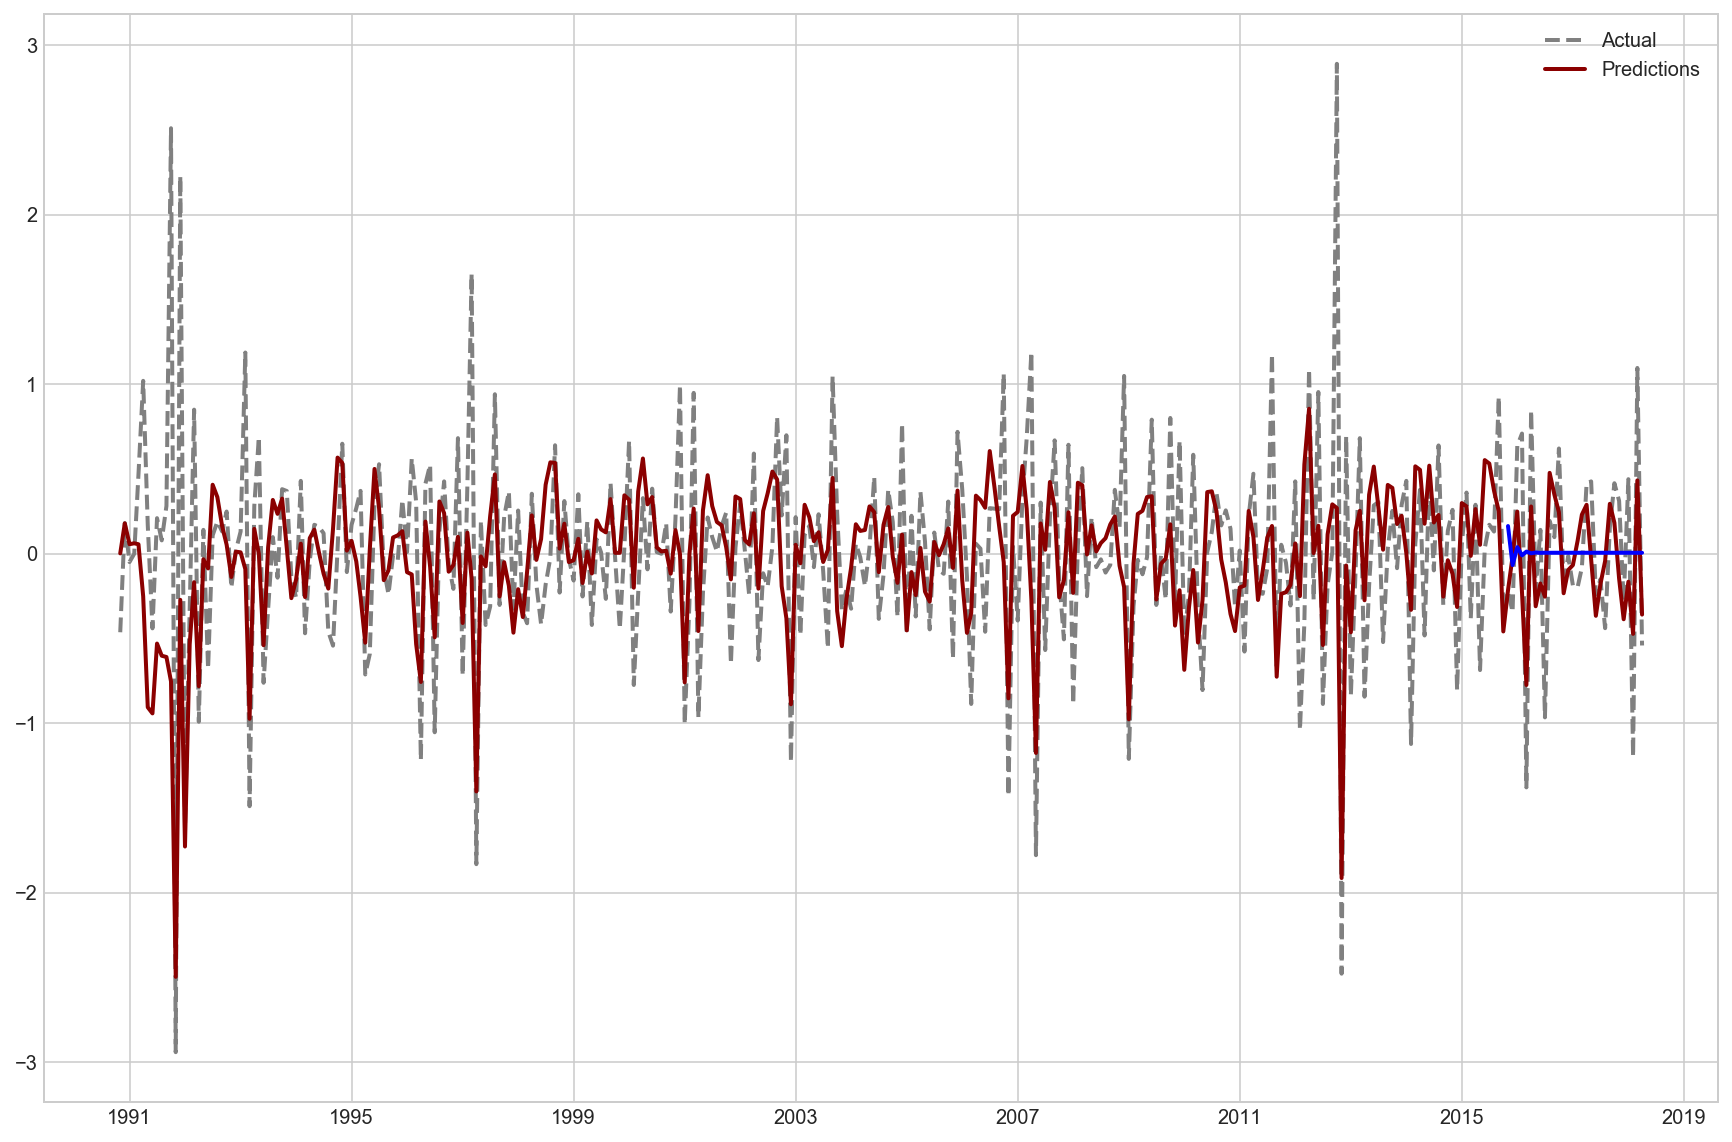

In [90]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(date_ticks[5:], nwpt_waves.highest_diff.dropna().values, lw=2, color='grey', ls='dashed', label='Actual')
ax.plot(date_ticks[5:], prediction, lw=2, color='darkred', label='Predictions')
ax.plot(date_ticks[305:], predictions_oos, lw=2, color='blue')

plt.legend()
plt.show();

In [87]:
predictions_oos

array([ 0.16350355, -0.06640902,  0.0389936 , -0.00932786,  0.01282495,
        0.00266907,  0.00732499,  0.0051905 ,  0.00616905,  0.00572044,
        0.0059261 ,  0.00583182,  0.00587504,  0.00585523,  0.00586431,
        0.00586015,  0.00586205,  0.00586118,  0.00586158,  0.0058614 ,
        0.00586148,  0.00586144,  0.00586146,  0.00586145,  0.00586146,
        0.00586145,  0.00586145,  0.00586145,  0.00586145,  0.00586145])

In [93]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(nwpt_waves.Highest.dropna().values, (1,0)).fit()
model.summary()

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/dfreema1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  333
Model:                     ARMA(1, 0)   Log Likelihood                -225.545
Method:                       css-mle   S.D. of innovations              0.476
Date:                Thu, 07 Jun 2018   AIC                            457.090
Time:                        20:31:43   BIC                            468.514
Sample:                             0   HQIC                           461.646
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2893      0.033    159.712      0.000       5.224       5.354
ar.L1.y        0.2125      0.053      3.973      0.000       0.108       0.317
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7059           +0.0000j            4.7059            0.0000
-----------------------------------------------------------------------------
"""

In [99]:
import statsmodels.api as sm
data = nwpt_waves.Highest.dropna().values
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,1), seasonal_order=(0,1,1,4))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  333
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -235.970
Date:                           Thu, 07 Jun 2018   AIC                            477.940
Time:                                   20:42:25   BIC                            489.364
Sample:                                        0   HQIC                           482.495
                                           - 333                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9389      0.028    -33.601      0.000      -0.994      -0.884
ma.S.L4       -0.9996      1.287     -0.777

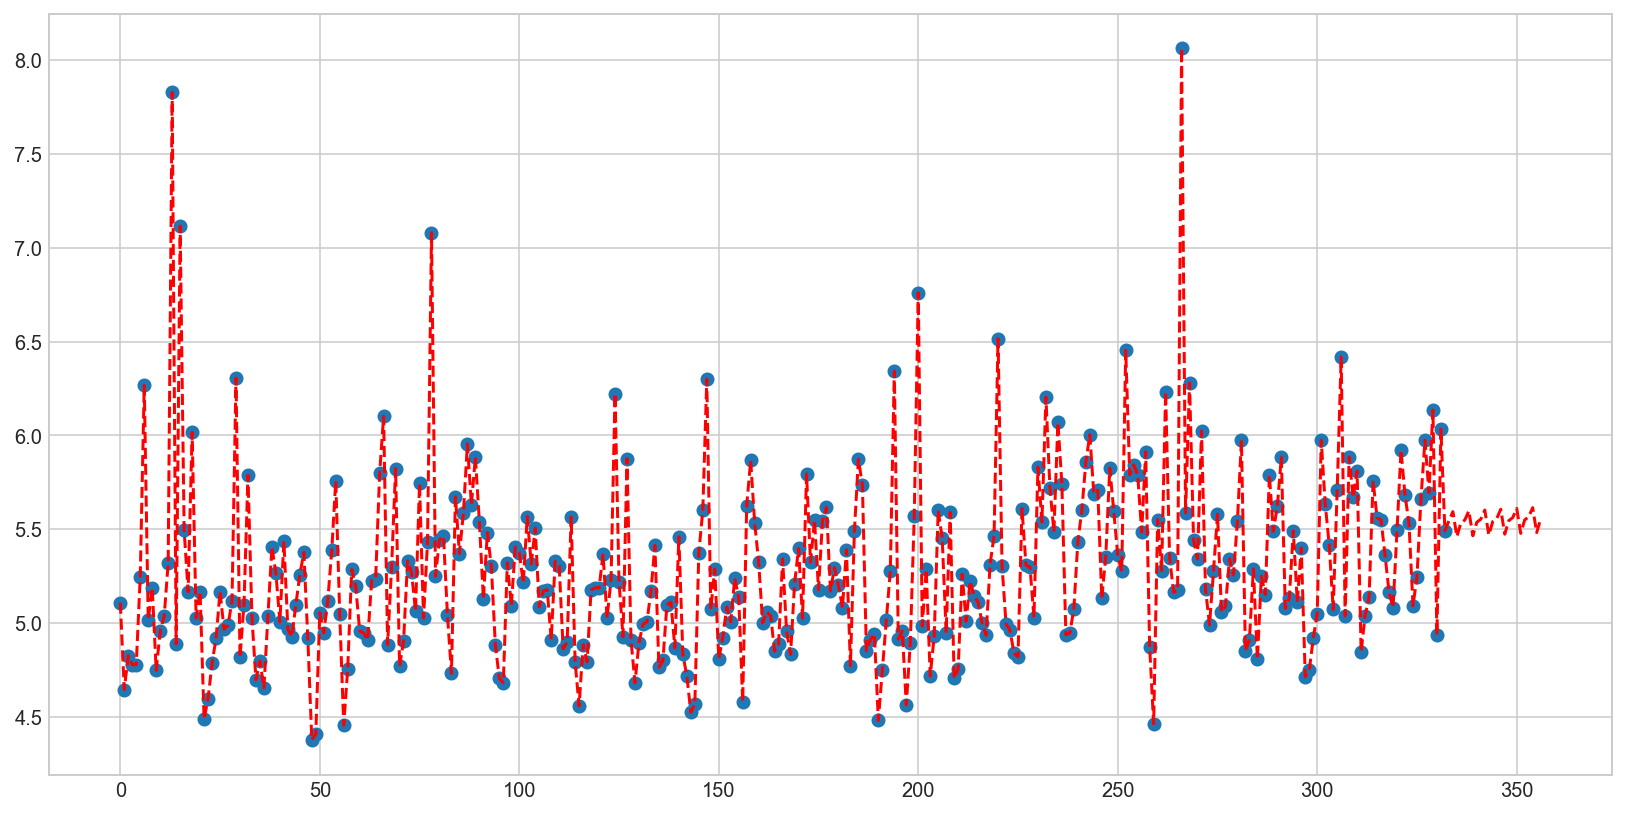

In [108]:
res = model.fit()
preds = res.forecast(24)
fcast = np.concatenate((nwpt_waves.Highest.dropna().values, preds), axis=0)

plt.figure(figsize=(14,7));
plt.plot(data, 'o' , fcast, 'r--');
